In [ ]:

import os
import sys
#sys.path.append(os.getcwd()+"/../../../GW_And_NG/SensitivityCurves")
sys.path.append(os.getcwd()+"/..")
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt

#from PlotSC import PlotSensitivityCurves

from TensorPowerSpec import PowSpecT

from GEFClassic.GEFClassic import GEF



In [2]:
#Set coupling Constant
beta=25
MbMexist=True

#Set path to the directory where the GEF results are stored
path = os.getcwd()
name = path+f"/../Out/GEF_Beta{beta}.0_SENone_M6.16_Bdr.dat"

#Set up initial conditions for the GEF system (I plan to streamline this at some point)
alpha = 0.
Mpl = 1.
M = 6.16e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0}
ntr = 150
H = GEF(beta, Mpl, ini, M, ntr, approx=True)
H.LoadData(name)
Nend = H.EndOfInflation()[0]


3.915915816822987e-05
[67.24679598]


In [3]:
P = PowSpecT(H)

k = (np.exp(Nend)*0.01)
ks = np.logspace(np.log10(P.mink), np.log10(P.maxk), 50)


3.915915816822987e-05
[67.24679598]
67.24679598067682


In [4]:
PT = P.ComputePowSpec(ks)

In [6]:
aH = H.vals["a"]*H.vals["H"]
PTAnalytic = P.PTAnalytical()

fs = P.ktofreq(ks)
faH = P.ktofreq(aH)

OmegaGW = P.PTtoOmega(PT["tot"], ks)
OmegaGWAnalytic = P.PTtoOmega(P.PTAnalytical()["tot"], aH)

['IPTA', 'BBO', 'NANOGrav', 'HL', 'SKA', 'PPTA', 'ET', 'CE', 'DECIGO', 'EPTA', 'HLVK', 'LISA', 'HLVO2', 'HLV']


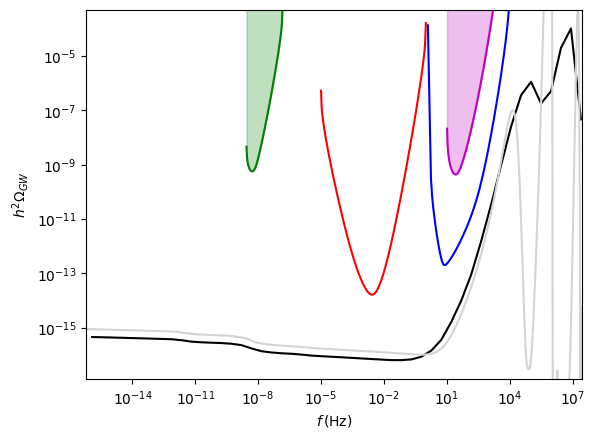

In [ ]:
limy = (min(OmegaGW/5), max(OmegaGW*5))
limx = (min(0.5*fs), max(1.1*fs))

fig, ax = plt.subplots(1,1)

ax.plot(fs, OmegaGW, "k")
ax.plot(faH, OmegaGWAnalytic, "lightgray")
#PlotSensitivityCurves(ax, ["LISA", "ET", "NANOGrav", "HLVK"], ["r", "b", "g", "m", "y", "c"])
ax.set_xlim(limx)
ax.set_ylim(limy)

ax.set_ylabel("$h^2 \Omega_{GW}$")
ax.set_xlabel(r"$f\,({\rm Hz})$")
ax.set_yscale("log")
ax.set_xscale("log")
#plt.savefig(f"../Plots/OmegaGW_beta{beta}.png")
plt.show()